# Exercises day 02 - 2


In [56]:
def plot_dist_hist() -> None:
    pass

## Ex01
**Generate simulated values from different distributions**

### a) Exponential


### b) Normal (Box-Mueller)

In [57]:
def box_mueller_adv(num_samples : int) -> list[float]:
    """
        Here we used the smart method which Bo introduced on slide 16 of the third lecture.
        (See slide 16 of 'slide4m1.pdf')
        NOTE: due to the nature of finding two samples at a time, the number of samples must be even.
        If the number of samples isn't even then the function will return a list of num_samples + 1.
        (e.g if num_samples = 5, then the function will return 6 samples)
        
        :param num_samples: number of samples to generate.
        
        :return: list of samples.
    """
    counter = 0
    
    accepted = []
    U_1 = np.random.uniform(0.0, 1.0, num_samples)
    V = np.random.uniform(-1.0, 1.0, (2, num_samples))
    
    i = 0
    while counter < num_samples:
        V_1 = V[0][i]
        V_2 = V[1][i]
        R_squared = V_1**2 + V_2**2
        if R_squared <= 1:
            # We accept the samples (and calculate them as per slides)
            coeff = np.sqrt(-2 * np.log(U_1[i]))
            R = np.sqrt(R_squared)
            Z_1 = coeff * V_1 / R 
            Z_2 = coeff * V_2 / R
            accepted.append(Z_1); accepted.append(Z_2)
            counter += 2
        if i == num_samples - 1:
            # We generate new samples if we run out
            i = 0
            U_1 = np.random.uniform(0.0, 1.0, num_samples)
            V = np.random.uniform(-1.0, 1.0, (2, num_samples))
        i += 1


    return accepted
        
        


In [58]:
def box_mueller(num_samples : int) -> list[float]:
    """
        Generate num_samples samples from a standard normal distribution, by the Box-Mueller method.
        NOTE: due to the nature of finding two samples at a time, the number of samples must be even.
        If the number of samples isn't even then the function will return a list of num_samples + 1.
        (e.g if num_samples = 5, then the function will return 6 samples)
        
        :param num_samples: The number of samples to generate.
        
        :return: A list of num_samples samples from a standard normal distribution.
    """
    n = (num_samples // 2 + 1)
    
    accepted = []
    U_1 = np.random.uniform(0.0, 1.0, n)
    U_2 = np.random.uniform(0.0, 1.0, n)
    
    for i in range(n):
        Z_1 = np.sqrt(-2 * np.log(U_1[i])) * np.cos(2 * np.pi * U_2[i])
        Z_2 = np.sqrt(-2 * np.log(U_1[i])) * np.sin(2 * np.pi * U_2[i])
        
        accepted.append(Z_1); accepted.append(Z_2)
        

    return accepted


Normal distribution with central limit theorem. 

### c) Pareto distribution

**Plotting**

## Ex02: Pareto distribution

**For the Pareto distribution with support on $[\beta, \infty[$ compare mean value and variance, with analytical results, which can be calculated as E(X) = 'stuff'.
Var(X) = 'stuff'.**

We have by common decision (and by looking at slides) agreed that $k$ may assum real values.

In [59]:
NUM_Ks = 100
NUM_BETAs = 100

ks = np.linspace(2.05, 4, NUM_Ks)
betas = np.linspace(1, 10, NUM_BETAs)

pareto_means = np.zeros((NUM_Ks, NUM_BETAs))
pareto_vars = np.zeros_like(pareto_means) # <-- damn this is new, hella cool B)

pareto_E = lambda k, beta: beta * (k / (k - 1))
pareto_Var = lambda k, beta: beta**2 * (k) / ((k-1)**2 * (k-2))


for i, k in enumerate(ks):
    for j, beta in enumerate(betas):
        X = pareto_samples(k, beta, NUMS_TO_GENERATE)
        pareto_means[i, j] = np.abs(pareto_E(k, beta) -  X.mean())

        pareto_vars[i,j] = np.abs(pareto_Var(k, beta) - X.var())


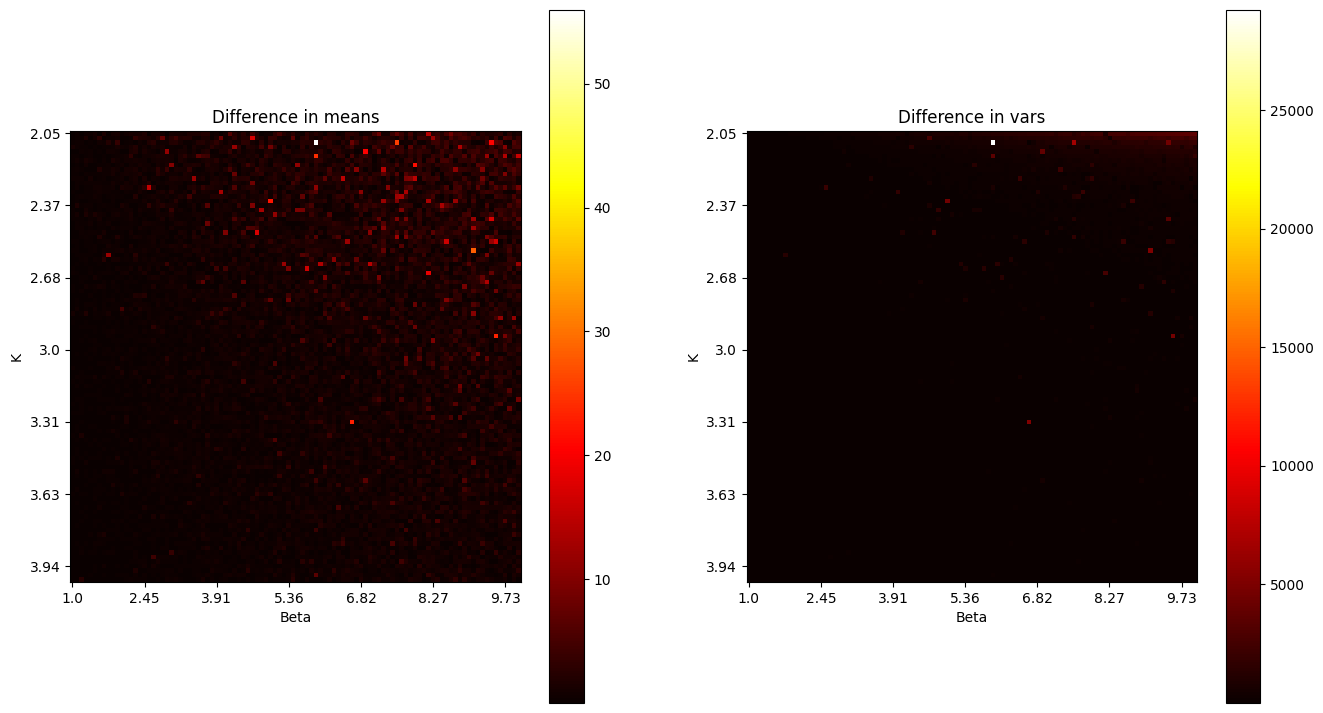

In [60]:
NUM_TICKS = 6
TICKS_ROUNDING = 2
TICKS_DIVISOR_X = NUM_Ks // NUM_TICKS
TICKS_DIVISOR_Y = NUM_BETAs // NUM_TICKS

xs = [round(beta, TICKS_ROUNDING) for beta in betas[::TICKS_DIVISOR_X]]
x_locs = range(NUM_Ks)[::TICKS_DIVISOR_X]

ys = [round(k, TICKS_ROUNDING) for k in ks[::TICKS_DIVISOR_Y]]
y_locs = range(NUM_BETAs)[::TICKS_DIVISOR_Y]

plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)
plt.title("Difference in means")
#plt.contour([ks,betas],pareto_mean)
plt.imshow(pareto_means, cmap='hot', interpolation='nearest')
plt.xticks(x_locs, xs)
plt.yticks(y_locs, ys)
plt.xlabel("Beta")
plt.ylabel("K")
plt.colorbar()

plt.subplot(1, 2, 2)  
plt.title("Difference in vars")   
plt.imshow(pareto_vars, cmap='hot', interpolation='nearest') 
plt.xticks(x_locs, xs)
plt.yticks(y_locs, ys)
plt.xlabel("Beta")
plt.ylabel("K")
plt.colorbar()

plt.show()  

Our sampled mean fits quite well with the theoretical expect value. There are some noticable differences, particularly for low values of $k$ and high values of $\beta$.

However, the sampled variance Vs. the theorical variance has some serious outliers. It is interesting to note that these outliers can be located in the same region as for the expected value i.e. low values of $k$ and high values of $\beta$.

In [61]:
def compute_confidence_interval_sample(data : list[float], confidence : float = 0.95):
    """
        Compute the confidence interval of the mean and varaince of the data.
        :param data: list of data
        :param confidence: confidence level
        
        :return: confidence interval of the mean of the data
    """
    N = len(data)
    alpha = 1 - confidence

    data = np.array(data)
    #conf_mean = [data.mean - confidence * data.std()/np.sqrt(N), data.mean + confidence * data.std()/np.sqrt(N)]
    conf_mean = [data.mean() + data.std()/np.sqrt(N) * scipy.stats.t.cdf(alpha/2, N - 1), data.mean() + data.std()/np.sqrt(N) * scipy.stats.t.cdf(1-alpha/2, N - 1)]

    conf_var = [((N-1)*data.var())/(scipy.stats.chi2.cdf(1- alpha/2, N - 1)),((N-1)*data.var())/(scipy.stats.chi2.cdf(alpha/2, N - 1))]
    return conf_mean, conf_var

Seems normal distributed too...?